In [145]:
import warnings

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from helpers import model_report_from

In [146]:
# sometimes optimization fails to converge during grid search and i dont care
warnings.filterwarnings('ignore')

In [147]:
# load training/testing data
ft_train = np.load("./processed_data/features_train.npy")
ft_test = np.load("./processed_data/features_test.npy")
lbl_train = np.load("./processed_data/labels_train.npy")
lbl_test = np.load("./processed_data/labels_test.npy")

In [148]:
ft_names = np.load("./processed_data/feature_names.npy")

# Bagging

## Hyperparameter tuning

In [149]:
param = {
    'base_estimator' : [DecisionTreeClassifier(class_weight='balanced'), LogisticRegression(class_weight='balanced', C=0.003)],
    'n_estimators' : [10, 20, 50], 
    'bootstrap_features' : [True, False]
}

In [150]:
clf = GridSearchCV(BaggingClassifier(), param, scoring='recall', refit=True, cv=5)

In [151]:
clf.fit(ft_train, lbl_train)
clf.best_params_

{'base_estimator': LogisticRegression(C=0.003, class_weight='balanced'),
 'bootstrap_features': False,
 'n_estimators': 20}

## Final Bagging Classifier

In [152]:
bag = BaggingClassifier(clf.best_params_['base_estimator'], n_estimators=clf.best_params_['n_estimators'])

In [153]:
bag.fit(ft_train, lbl_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.003,
                                                    class_weight='balanced'),
                  n_estimators=20)

accuracy = 0.735812133072407
precision = 0.14052287581699346
recall = 0.86
f1 = 0.24157303370786515
ROC AUC score = 0.7947119341563786


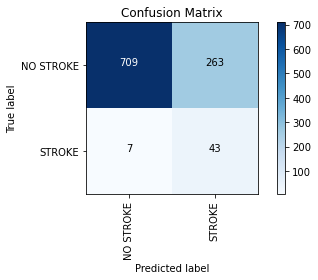

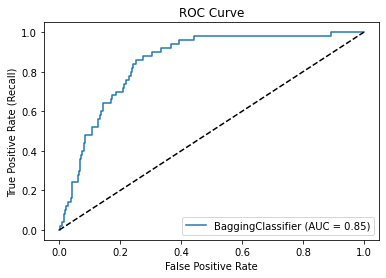

In [154]:
model_report_from(bag, ft_test, lbl_test, [])

# Random Forest

## Hyperparameter tuning

In [155]:
param = {
    'n_estimators' : [50, 100, 150, 200, 300, 500],
    'max_leaf_nodes' : [16, 24, 30]
}

In [156]:
clf = GridSearchCV(RandomForestClassifier(class_weight="balanced", n_jobs=-1, criterion='entropy'), param, scoring='recall', refit=True, cv=5)

In [157]:
clf.fit(ft_train, lbl_train)
clf.best_params_

{'max_leaf_nodes': 16, 'n_estimators': 50}

## Final Random Forest Classifier

In [158]:
# training with parameters determined above
rfc = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_leaf_nodes=clf.best_params_['max_leaf_nodes'], n_jobs=-1, class_weight='balanced', criterion='entropy')

In [159]:
rfc.fit(ft_train, lbl_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

accuracy = 0.7240704500978474
precision = 0.13975155279503104
recall = 0.9
f1 = 0.24193548387096775
ROC AUC score = 0.8075102880658436


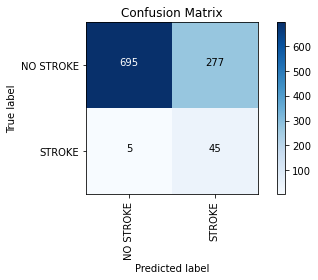

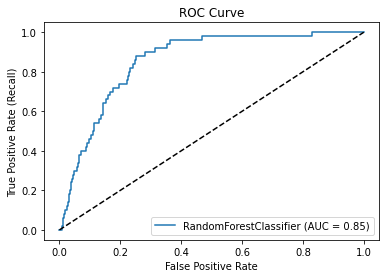

In [160]:
model_report_from(rfc, ft_test, lbl_test, [])

In [161]:
rfc_fi = rfc.feature_importances_

In [162]:
# showing list of features that have importance greater than 1%
[(ft, rfc_fi[i], i) for i, ft in enumerate(ft_names) if rfc_fi[i] > 0.01]

[('Unknown', 0.011512070171721801, 0),
 ('formerly smoked', 0.011830065594588594, 1),
 ('Self-employed', 0.010475646388117694, 7),
 ('children', 0.03684753166683619, 8),
 ('No', 0.06601148629437857, 14),
 ('Yes', 0.05209120809765614, 15),
 ('age', 0.4365378018552743, 16),
 ('hypertension', 0.05551752701888227, 17),
 ('heart_disease', 0.03725616395863334, 18),
 ('avg_glucose_level', 0.08733969646062135, 19),
 ('bmi', 0.0800356311190925, 20),
 ('age_weighted_bmi_deviation', 0.06303837102469688, 21)]